# Analysis of the experimentation results

In [1]:
%cd ~/work/nbs_pipeline

/home/macu/work/nbs_pipeline


In [2]:
import pandas as pd
import numpy as np
import ydata_profiling as ydp
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import json
from copy import deepcopy

# Load experimentation data
## Select case file

In [3]:
#file_errors_small  = 'errors_small_03022025_2.csv'
#file_results_small = 'results_small_03022025_2.csv'
#file_errors_small  = 'errors_small_04022025_1.csv'
#file_results_small = 'results_small_04022025_1.csv'
#file_errors_small  = 'errors_small_06022025_1.csv'
#file_results_small = 'results_small_06022025_1.csv'
#file_errors_small  = 'errors_small_07022025_1.csv'
#file_results_small = 'results_small_07022025_1.csv'
file_errors_small  = 'errors_window_mix.csv'
file_results_small = 'results_window_mix.csv'
#file_errors_small  = 'errors_small_10022025_2.csv'
#file_results_small = 'results_small_10022025_2.csv'
file_errors_small  = 'errors_small_11022025_2.csv'
file_results_small = 'results_small_11022025_2.csv'
file_errors_small  = 'errors_small_11022025_3.csv'
file_results_small = 'results_small_11022025_3.csv' ## Solo deterministics
file_errors_small  = 'errors_small_11022025_4.csv'
file_results_small = 'results_small_11022025_4.csv' ## Deterministic & seed solo en torch
file_errors_small  = 'errors_small_12022025_1.csv'
file_results_small = 'results_small_12022025_1.csv' ## Deterministic & seed solo en torch
file_errors_small  = 'errors_small_12022025_2.csv'
file_results_small = 'results_small_12022025_2.csv'

In [4]:
! ls {file_results_small}
! ls results_small_11022025*
! ls errors_small_11022025*

results_small_12022025_2.csv
results_small_11022025_1.csv  results_small_11022025_3.csv
results_small_11022025_2.csv  results_small_11022025_4.csv
errors_small_11022025_1.csv  errors_small_11022025_3.csv
errors_small_11022025_2.csv  errors_small_11022025_4.csv


In [5]:
results_small = pd.read_csv(file_results_small, index_col=None, header=0)
errors_small  = pd.read_csv(file_errors_small, index_col=None, header=0)

In [6]:
! tail 'errors_small_04022025_1.csv'

model_size,n_epochs,dataset_percent,masked_percent,n_windows,windows,error


In [7]:
print("----- ERRORS -----")
print(f"Total error cases: {len(errors_small)}")
display(errors_small.head())
print(f"Total results: {len(results_small)}")
display(results_small.tail())

----- ERRORS -----
Total error cases: 0


,model_size,n_epochs,dataset_percent,masked_percent,n_windows,windows,error


Total results: 72


,model_size,n_epochs,dataset_percent,masked_percent,n_windows,time,first_train_loss,first_mse,first_rmse,first_mae,...,last_mae,last_smape,windows,best_epochs,train_losses,eval_pre,eval_post,full_result,first_eval_loss,last_eval_loss
67,small,20,0.3,0.75,2,157.906597,0.007721,0.089605,0.008123,0.051471,...,0.051187,0.157245,[12],[6],"[0.007720991549831524, 0.0007562381190382439, ...","{'loss': [0.007720991549831524], 'mse': [0.089...","{'loss': [0.00765950787535985], 'mse': [0.0891...","([[0.007720991549831524, 0.0007562381190382439...",0.007721,0.00766
68,small,20,0.3,0.75,4,157.856855,0.007721,0.089605,0.008123,0.051471,...,0.051187,0.157245,[12],[6],"[0.007720991549831524, 0.0007562381190382439, ...","{'loss': [0.007720991549831524], 'mse': [0.089...","{'loss': [0.00765950787535985], 'mse': [0.0891...","([[0.007720991549831524, 0.0007562381190382439...",0.007721,0.00766
69,small,20,0.3,0.75,6,157.380960,0.007721,0.089605,0.008123,0.051471,...,0.051187,0.157245,[12],[6],"[0.007720991549831524, 0.0007562381190382439, ...","{'loss': [0.007720991549831524], 'mse': [0.089...","{'loss': [0.00765950787535985], 'mse': [0.0891...","([[0.007720991549831524, 0.0007562381190382439...",0.007721,0.00766
70,small,20,0.3,0.75,8,157.756716,0.007721,0.089605,0.008123,0.051471,...,0.051187,0.157245,[12],[6],"[0.007720991549831524, 0.0007562381190382439, ...","{'loss': [0.007720991549831524], 'mse': [0.089...","{'loss': [0.00765950787535985], 'mse': [0.0891...","([[0.007720991549831524, 0.0007562381190382439...",0.007721,0.00766
71,small,20,0.3,0.75,10,157.779084,0.007721,0.089605,0.008123,0.051471,...,0.051187,0.157245,[12],[6],"[0.007720991549831524, 0.0007562381190382439, ...","{'loss': [0.007720991549831524], 'mse': [0.089...","{'loss': [0.00765950787535985], 'mse': [0.0891...","([[0.007720991549831524, 0.0007562381190382439...",0.007721,0.00766


In [8]:
(0.006430488714078606-0.006421495916369809)*100/0.006430488714078606

0.13984625599463982

## Check losses

In [9]:
import re

In [10]:
def get_loss(x, pos = 0):
    loss_value = np.nan
    if isinstance(x, dict) and 'loss' in x:
        #print("Is dict")
        loss_value = x['loss']
    else: 
        #print("Look for a match")
        match = re.search(r"'loss':\s*([\d\.\-e]+|\[.*?\])", x)
        if match: 
            #print("Is match")
            loss_value = ast.literal_eval(match.group(1))
    if isinstance(loss_value, list) and len(loss_value) > 0:
        #print("Is list")
        loss_value = loss_value[0]
    return loss_value
    
    return np.nan 

In [11]:
get_loss(results_small['eval_pre'][0])

0.006951988981199975

In [12]:
def check_valid_losses(df, display_ = True):
    check              = df[['eval_pre', 'eval_post']].copy()
    check['loss_pre']  = df['eval_pre'].apply(lambda x: get_loss(x, 0))
    check['loss_post'] = df['eval_post'].apply(lambda x: get_loss(x, -1))
    #check['loss_pre']  = df['eval_pre'].apply(lambda x: ast.literal_eval(x)['loss'][0])
    #check['loss_post'] = df['eval_post'].apply(lambda x: ast.literal_eval(x)['loss'][0])
    check['pre_less_than_post']    = check['loss_pre'] > check['loss_post']
    check['absolute_difference']   = check['loss_pre'] - check['loss_post']
    check['percentage_difference'] = (check['absolute_difference'] * 100 / check['loss_pre'])
    check_filtered = check[check['loss_post'] > check['loss_pre']]
    if display_: display(check_filtered)
    summary = {
        "total_cases": len(check_filtered),
        "mean_absolute_difference": check_filtered['absolute_difference'].mean(),
        "mean_percentage_difference": check_filtered['percentage_difference'].mean(),
        "max_absolute_difference": check_filtered['absolute_difference'].max(),
        "max_percentage_difference": check_filtered['percentage_difference'].max(),
        "min_absolute_difference": check_filtered['absolute_difference'].min(),
        "min_percentage_difference": check_filtered['percentage_difference'].min(),
    }
    return check['percentage_difference']

In [13]:
def check(id):
    print((results_small['loss_pre'][id][0]-results_small['loss_post'][id][0])*100/results_small['loss_post'][id][0])

## Preprocess

### Utils

In [14]:
def safe_eval(x, key):
    val = np.nan
    if isinstance(x, dict):
        val = x
    else: 
        if isinstance(x, str) and x.startswith("{") and x.endswith("}"):
            # Reemplazamos:
            # - comillas simples por dobles, para formar un JSON válido
            # - 'nan' por 'null', en caso de que aparezca
            x_mod = x.replace("'", '"').replace("nan", "null")
            try:
                val = json.loads(x_mod)[key]
            except json.JSONDecodeError as e:
                print("Error parsing ", x)
                print("Error details: ", e)
                raise e
    return val

In [15]:
def improvement_percentage(pre, post):
    return [(pre_val-p)*100 / pre_val if pre_val != 0 else np.nan for pre_val, p in zip(pre, post)]

In [16]:
def get_last(x):
    try:
        return ast.literal_eval(x)[-1]
    except:
        return x[-1]
def get_pos_last(x):
    try: 
        return get_pos(ast.literal_eval(x),-1)
    except:
        return get_pos(x,-1)

In [17]:
def get_pos(x, pos, pos2 = None): 
    try:
        return x[pos][pos2]
    except:
        try:
            return x[pos]
        except:
            return x

### Format & extract

In [18]:
results_small['windows']    = results_small['windows'].apply(lambda x: list(set(x)))
results_small['loss_pre']   = results_small["eval_pre"].apply(lambda x: safe_eval(x,'loss'))
results_small['loss_post']  = results_small["eval_post"].apply(lambda x: safe_eval(x, 'loss'))
results_small["best_epoch"] =  results_small["best_epochs"].apply(lambda x: get_last(x))

In [19]:
check(0)
#check(10)
#check(50)

0.2793892341583767


### Build improvement (from losses)

In [20]:
results_small['improvement'] = check_valid_losses(results_small, True)

,eval_pre,eval_post,loss_pre,loss_post,pre_less_than_post,absolute_difference,percentage_difference
42,"{'loss': [0.0077310333372224704], 'mse': [0.08...","{'loss': [0.00776431012309331], 'mse': [0.0896...",0.007731,0.007764,False,-0.000033,-0.430431
43,"{'loss': [0.0077310333372224704], 'mse': [0.08...","{'loss': [0.00776431012309331], 'mse': [0.0896...",0.007731,0.007764,False,-0.000033,-0.430431
44,"{'loss': [0.0077310333372224704], 'mse': [0.08...","{'loss': [0.00776431012309331], 'mse': [0.0896...",0.007731,0.007764,False,-0.000033,-0.430431
45,"{'loss': [0.0077310333372224704], 'mse': [0.08...","{'loss': [0.00776431012309331], 'mse': [0.0896...",0.007731,0.007764,False,-0.000033,-0.430431
46,"{'loss': [0.0077310333372224704], 'mse': [0.08...","{'loss': [0.00776431012309331], 'mse': [0.0896...",0.007731,0.007764,False,-0.000033,-0.430431
47,"{'loss': [0.0077310333372224704], 'mse': [0.08...","{'loss': [0.00776431012309331], 'mse': [0.0896...",0.007731,0.007764,False,-0.000033,-0.430431
48,"{'loss': [0.007720991549831524], 'mse': [0.089...","{'loss': [0.007790205316268839], 'mse': [0.090...",0.007721,0.007790,False,-0.000069,-0.896436
49,"{'loss': [0.007720991549831524], 'mse': [0.089...","{'loss': [0.007790205316268839], 'mse': [0.090...",0.007721,0.007790,False,-0.000069,-0.896436
50,"{'loss': [0.007720991549831524], 'mse': [0.089...","{'loss': [0.007790205316268839], 'mse': [0.090...",0.007721,0.007790,False,-0.000069,-0.896436
51,"{'loss': [0.007720991549831524], 'mse': [0.089...","{'loss': [0.007790205316268839], 'mse': [0.090...",0.007721,0.007790,False,-0.000069,-0.896436


In [21]:
print("Min: ", min(results_small["improvement"]))
print("Max: ", max(results_small["improvement"]))
print("Mean: ", np.mean(results_small["improvement"]))

Min:  -0.8964362412600386
Max:  1.0587413260147618
Mean:  0.362738367393938


## Build profile df

In [22]:
profile_small_df = results_small[[
    "time", 
    "best_epoch", 
    "dataset_percent", 
    "masked_percent", 
    "n_windows", 
    "improvement"
]].copy()

In [23]:
results_small["last_best_epoch"] = results_small["best_epochs"].apply(lambda x: get_pos_last(x))

## Check best improvements

<Axes: title={'center': 'Improvement per case'}>

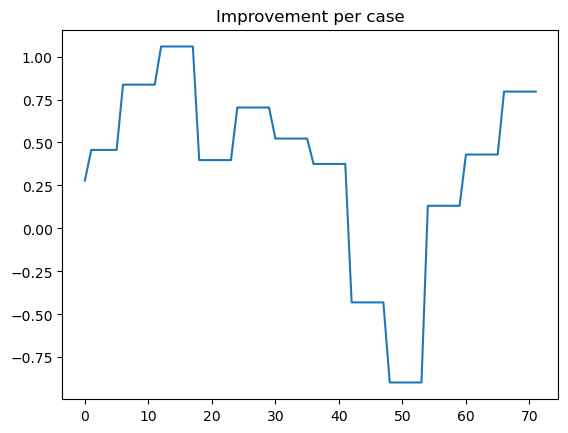

In [24]:
profile_small_df['improvement'].plot(title = "Improvement per case")

In [25]:
display(profile_small_df.sort_values('improvement', ascending = False)[:5])

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
12,69.142067,15,0.15,0.75,1,1.058741
16,69.261150,15,0.15,0.75,8,1.058741
15,69.771765,15,0.15,0.75,6,1.058741
14,69.201569,15,0.15,0.75,4,1.058741
17,69.374156,15,0.15,0.75,10,1.058741


In [26]:
#display(results_small.iloc[109])

In [27]:
profile_small_df[profile_small_df["time"] < 8 ].shape

(0, 6)

In [28]:
display(profile_small_df.sort_values('improvement', ascending = False)[:10])

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
12,69.142067,15,0.15,0.75,1,1.058741
16,69.261150,15,0.15,0.75,8,1.058741
15,69.771765,15,0.15,0.75,6,1.058741
14,69.201569,15,0.15,0.75,4,1.058741
17,69.374156,15,0.15,0.75,10,1.058741
13,69.288896,15,0.15,0.75,2,1.058741
11,69.661467,17,0.15,0.50,10,0.836573
9,69.387274,17,0.15,0.50,6,0.836573
8,69.368922,17,0.15,0.50,4,0.836573
10,69.813795,17,0.15,0.50,8,0.836573


In [29]:
print("--------------------- All dataset percent -----------------")
# Filtrar los 5 mejores loss_percents
display(profile_small_df.sort_values('improvement', ascending = False)[:5])
print("--------------------- Ensure dataset percent <= 0.25 -----------------")
# Filtrar los 5 mejores loss_percent con dataset percent <= 0.25
display(profile_small_df[profile_small_df['dataset_percent'] < 0.50].sort_values('improvement', ascending = False)[:5])

--------------------- All dataset percent -----------------


,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
12,69.142067,15,0.15,0.75,1,1.058741
16,69.261150,15,0.15,0.75,8,1.058741
15,69.771765,15,0.15,0.75,6,1.058741
14,69.201569,15,0.15,0.75,4,1.058741
17,69.374156,15,0.15,0.75,10,1.058741


--------------------- Ensure dataset percent <= 0.25 -----------------


,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
12,69.142067,15,0.15,0.75,1,1.058741
16,69.261150,15,0.15,0.75,8,1.058741
15,69.771765,15,0.15,0.75,6,1.058741
14,69.201569,15,0.15,0.75,4,1.058741
17,69.374156,15,0.15,0.75,10,1.058741


# Check Linear correlation 

In [30]:
def plot_correlation(profile, figsize=(8, 6)):
    correlation_matrix = profile.corr()
    # Crear el heatmap con seaborn
    plt.figure(figsize = figsize)  # Ajusta el tamaño si es necesario
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()

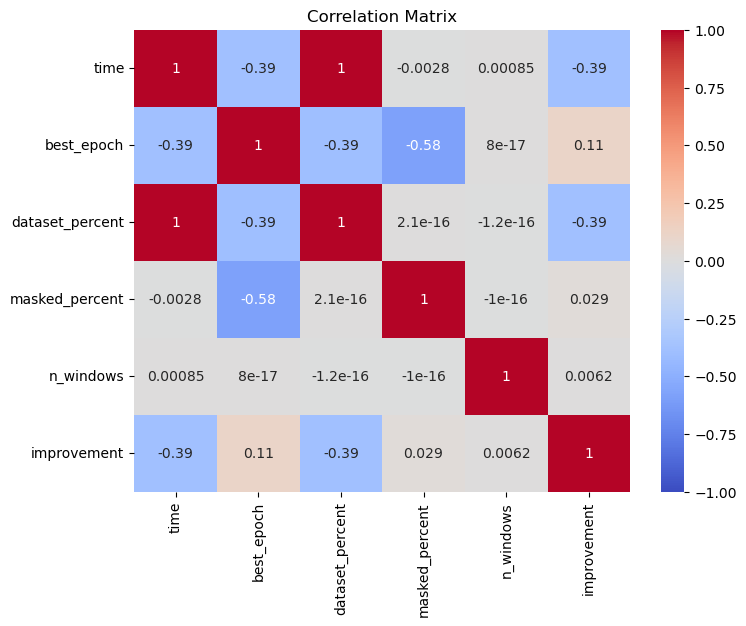

In [31]:
profile_small = ydp.ProfileReport(profile_small_df, title="Pandas Profiling Report for 'df_loss_small'", explorative=True)
plot_correlation(profile_small_df)

Dados los resultados creo que lo que más sentido tiene es hacer la tabla
- 0.25 dataset

In [32]:
results_small["best_epochs"][:10]

0    [17]
1    [17]
2    [17]
3    [17]
4    [17]
5    [17]
6    [17]
7    [17]
8    [17]
9    [17]
Name: best_epochs, dtype: object

In [33]:
results_small["best_epochs"] = results_small["best_epochs"].apply(lambda x: ast.literal_eval(x))

In [34]:
results_small["best_epochs"][0][0]

17

In [35]:
all_epochs = [epoch for sublist in results_small["best_epochs"] for epoch in sublist]
print("pre")
print(all_epochs)
all_epochs = [x for x in all_epochs if isinstance(x, int)]
print("post")
print(all_epochs)

pre
[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 10, 10, 10, 10, 10, 10, 19, 19, 19, 19, 19, 19, 8, 8, 8, 8, 8, 8, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 6, 6, 6, 6, 6, 6]
post
[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 10, 10, 10, 10, 10, 10, 19, 19, 19, 19, 19, 19, 8, 8, 8, 8, 8, 8, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 6, 6, 6, 6, 6, 6]


In [36]:
def epoch_frequencies(all_epochs):
    epoch_counts = pd.Series(all_epochs).value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    plt.bar(epoch_counts.index, epoch_counts.values)
    plt.xlabel("Best epoch")
    plt.ylabel("Frequency")
    plt.title("Best epoch frequency")
    plt.xticks(epoch_counts.index)  # Asegurar que se muestren todas las épocas en el eje X
    plt.show()

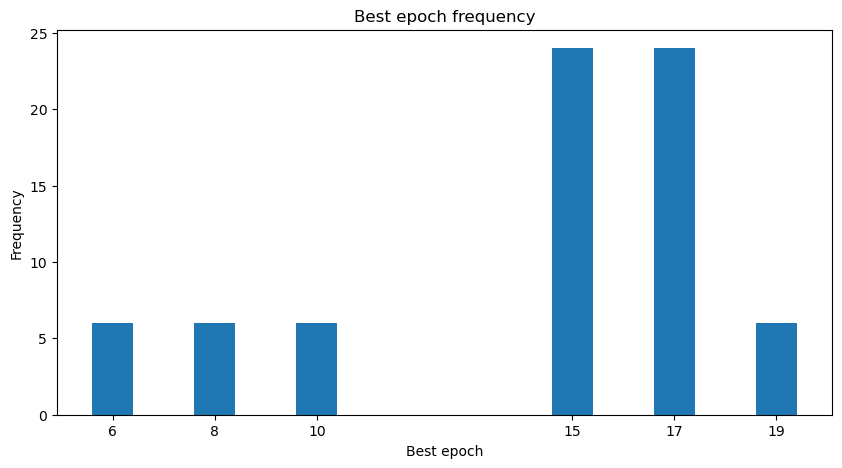

In [37]:
epoch_frequencies(all_epochs)

# Check feature relevance with other techniques
## Sklearn feature relevance analysis

### SelectKBest

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import pandas as pd

def select_k_best_features(df, target_column, k='all'):
    """
    Select the best features using SelectKBest and f_regression.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    k (int or 'all', optional): Number of best features to select (default 'all').
    
    Returns:
    pd.DataFrame: Feature importance scores sorted in descending order.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    
    scores = selector.scores_
    feature_importance = scores / np.sum(scores)  # Normalize scores
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'SelectKBest_Score': scores,
        'SelectKBest_Percentage': feature_importance * 100
    })
    
    return importance_df.sort_values(by='SelectKBest_Percentage', ascending=False)


### Random forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_feature_importance(df, target_column):
    """
    Compute feature importance using a RandomForestRegressor.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    
    Returns:
    pd.DataFrame: Feature importance scores sorted in descending order.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    rf_importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'RandomForest_Importance': rf_importances * 100
    })
    
    return importance_df.sort_values(by='RandomForest_Importance', ascending=False)


### Check cmbined feature importance

In [40]:
def analyze_feature_importance(df, target_column, k='all'):
    """
    analyze feature importance using both SelectKBest and RandomForestRegressor.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    k (int or 'all', optional): Number of best features to select (default 'all').
    
    Returns:
    pd.DataFrame: Combined feature importance scores sorted in descending order.
    """
    k_best_df = select_k_best_features(df, target_column, k)
    rf_df = random_forest_feature_importance(df, target_column)
    
    combined_df = pd.merge(k_best_df, rf_df, on='Feature', how='outer')
    return combined_df.sort_values(by='RandomForest_Importance', ascending=False)


In [41]:
results_small["best_epochs"][0][0]

17

In [42]:
df = profile_small_df[["masked_percent", "n_windows", "dataset_percent", "improvement"]].copy()
df["best_epoch"] = results_small["best_epochs"].apply(lambda x: x[0])
df_feat = df [ df [ "masked_percent" ]  < 1 ]
df_feat = df_feat [ df_feat [ "masked_percent" ]  > 0 ]
df_feat = df_feat [ df_feat [ "dataset_percent" ]  < 1 ]
df_feat[:5]

,masked_percent,n_windows,dataset_percent,improvement,best_epoch
0,0.25,1,0.15,0.278611,17
1,0.25,2,0.15,0.456647,17
2,0.25,4,0.15,0.456647,17
3,0.25,6,0.15,0.456647,17
4,0.25,8,0.15,0.456647,17


In [43]:
df_feat[pd.isna(df_feat["improvement"])]

,masked_percent,n_windows,dataset_percent,improvement,best_epoch


In [44]:
result = analyze_feature_importance(df_feat, target_column="improvement")
display(result)

,Feature,SelectKBest_Score,SelectKBest_Percentage,RandomForest_Importance
0,dataset_percent,12.358185,92.916337,58.888877
2,masked_percent,0.059224,0.445282,23.037147
1,best_epoch,0.880279,6.618470,17.992349
3,n_windows,0.002648,0.019911,0.081627


In [45]:
def count_epoch(df):
    all_epochs = df["best_epoch"]
    print(all_epochs.unique)
    epoch_counts = pd.Series(all_epochs).value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    plt.bar(epoch_counts.index, epoch_counts.values)
    plt.xlabel("Best epoch")
    plt.ylabel("Frequency")
    plt.title("Best epoch frequency")
    plt.xticks(epoch_counts.index)  # Asegurar que se muestren todas las épocas en el eje X
    plt.show()

<bound method Series.unique of 0     17
1     17
2     17
3     17
4     17
      ..
67     6
68     6
69     6
70     6
71     6
Name: best_epoch, Length: 72, dtype: int64>


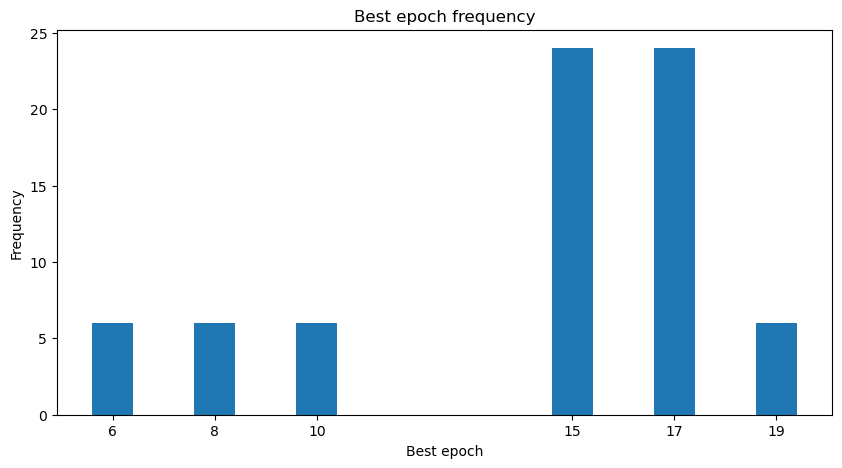

In [46]:
count_epoch(df_feat)

# Best option

In [47]:
def best_combination_for_improvement(df, target_column, importance_df):
    """
    A partir del análisis de importancia (importance_df), selecciona las dos variables 
    más relevantes (según el promedio de SelectKBest_Percentage y RandomForest_Importance). 
    Para cada una, obtiene el valor que da mayor improvement (promedio del target).
    Luego, filtra el DataFrame a esos casos y, en ese subconjunto, para cada variable restante,
    obtiene el valor que maximiza el improvement.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame de entrada.
    target_column : str
        Nombre de la variable objetivo (por ejemplo, "improvement").
    importance_df : pd.DataFrame
        DataFrame resultante de analyze_feature_importance, que debe contener las columnas 
        'Feature', 'SelectKBest_Percentage' y 'RandomForest_Importance'.
    
    Returns:
    --------
    best_values : dict
        Diccionario con para cada variable (tanto las top2 como las restantes) el valor óptimo.
    avg_impr : float or None
        Promedio de improvement en el subconjunto filtrado (puede ser None si no hay casos).
    """
    # Calcular la importancia promedio de cada feature
    importance_df = importance_df.copy()
    importance_df["AvgImportance"] = (importance_df["SelectKBest_Percentage"] + importance_df["RandomForest_Importance"]) / 2
    
    # Ordenar y seleccionar las dos variables más relevantes
    top_features = importance_df.sort_values(by="AvgImportance", ascending=False)["Feature"].tolist()
    top2 = top_features[:2]
    
    best_values = {}
    
    # Para cada una de las dos variables más importantes, obtener el valor que genera mayor improvement.
    for feat in top2:
        # Agrupamos por la variable y calculamos el promedio de improvement para cada valor
        grouped = df.groupby(feat)[target_column].mean().reset_index()
        # Seleccionamos el valor cuyo promedio de improvement es mayor
        best_row = grouped.loc[grouped[target_column].idxmax()]
        best_values[feat] = best_row[feat]
    
    # Filtrar el DataFrame a los casos en que las dos variables toman esos valores
    filtered_df = df.copy()
    for feat, val in best_values.items():
        filtered_df = filtered_df[filtered_df[feat] == val]
    
    # Para el resto de las variables (excluyendo las dos top y el target), buscar el valor que dentro
    # del subconjunto filtrado genere el mayor improvement
    remaining_features = [feat for feat in df.columns if feat not in top2 and feat != target_column]
    for feat in remaining_features:
        grouped = filtered_df.groupby(feat)[target_column].mean().reset_index()
        if len(grouped) > 0:
            best_row = grouped.loc[grouped[target_column].idxmax()]
            best_values[feat] = best_row[feat]
        else:
            best_values[feat] = None  # En caso de no haber datos suficientes
    
    # También se puede obtener el improvement promedio en los casos filtrados por las dos variables top
    if len(filtered_df) > 0:
        avg_impr = filtered_df[target_column].mean()
    else:
        avg_impr = None
    
    return best_values, avg_impr


In [48]:
feature_importance = analyze_feature_importance(df_feat, target_column="improvement")
display(feature_importance)
best_vals, avg_improvement = best_combination_for_improvement(df_feat, target_column="improvement", importance_df=feature_importance)

print("Mejor combinación de valores:")
for feat, val in best_vals.items():
    print(f"{feat}: {val}")

print(f"\nImprovement promedio en el subconjunto de las top2: {avg_improvement}")


,Feature,SelectKBest_Score,SelectKBest_Percentage,RandomForest_Importance
0,dataset_percent,12.358185,92.916337,58.888877
2,masked_percent,0.059224,0.445282,23.037147
1,best_epoch,0.880279,6.618470,17.992349
3,n_windows,0.002648,0.019911,0.081627


Mejor combinación de valores:
dataset_percent: 0.15
best_epoch: 6.0
masked_percent: None
n_windows: None

Improvement promedio en el subconjunto de las top2: None


In [63]:
#final = df_feat[ df_feat["n_windows"] == 4].copy()
final = df_feat[ df_feat["dataset_percent"] == 0.15].copy()
#final = final[ final ["masked_percent"] == 0.5]
final = final [ final [ "best_epoch" ] == 6]
final

,masked_percent,n_windows,dataset_percent,improvement,best_epoch


In [50]:
final

,masked_percent,n_windows,dataset_percent,improvement,best_epoch
44,0.5,4,0.25,-0.430431,8


In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna.visualization as vis
import shap
import optuna
import warnings

In [52]:
#! pip install shap

In [53]:
class FeatureImportanceanalyzer:
    def __init__(self, df, target_column, k='all', show_values=True, columns=None, verbose = 0):
        self.df = df
        self.target_column = target_column
        self.X = df.drop(columns=[target_column])
        self.y = df[target_column]
        self.k = k
        self.show_values = show_values
        self.columns = columns if columns else [
            'RandomForest_Importance_pcnt', 
            'SelectKBest__pcnt', 
            'SHAP_Impact_pcnt', 
            'Correlation_pcnt'
        ]
        self.importance_df = None
        self.study = None # Optuna's study object
        self.verbose = verbose

    def compute_random_forest_importance(self):
        rf = RandomForestRegressor(n_estimators = 100, random_state=42)
        rf.fit(self.X, self.y)
        rf_importances = rf.feature_importances_
        return pd.DataFrame({'Feature': self.X.columns, 'RandomForest_Importance_pcnt': rf_importances*100})

    def compute_select_kbest_importance(self):
        selector = SelectKBest(score_func=f_regression, k=self.k)
        selector.fit(self.X, self.y)
        scores = selector.scores_
        importances = scores / np.sum(scores) # Normalize the scores
        
        return pd.DataFrame({'Feature': self.X.columns, 'SelectKBest__pcnt': importances*100})

    def compute_correlations(self):
        correlations = self.X.corrwith(self.y)
        return pd.DataFrame({'Feature': self.X.columns, 'Correlation_pcnt': correlations*100})

    def compute_shap_impact(self):
        model = RandomForestRegressor(random_state=42)
        model.fit(self.X, self.y)
        explainer   = shap.TreeExplainer(model, self.X)
        shap_values = explainer(self.X)
        mean_shap   = np.abs(shap_values.values).mean(axis=0)
        y_range = self.y.max()-self.y.min()
        #shap.plots.waterfall(shap_values[1])
        shap.plots.beeswarm(shap_values)
        return pd.DataFrame({'Feature': self.X.columns, 'SHAP_Impact_pcnt': mean_shap*100/y_range})

    def combine_importances(self):
        rf_df = self.compute_random_forest_importance()
        kbest_df = self.compute_select_kbest_importance()
        corr_df = self.compute_correlations()
        shap_df = self.compute_shap_impact()
        self.importance_df = pd.merge(
            pd.merge(
                pd.merge(rf_df, kbest_df, on='Feature'), 
                corr_df, on='Feature'
            ), 
            shap_df, on='Feature'
        )
        self.importance_df = self.importance_df.sort_values(
            by='RandomForest_Importance_pcnt', 
            ascending=False
        )

    def style_table(self):
        styled_df = self.importance_df[['Feature'] + self.columns]
        styled = styled_df.style.hide(axis="index")
        styled = styled_df.style.hide(axis="index")
        for col in self.columns:
            styled = styled.bar(
                subset= [col], 
                vmin  = -styled_df[col].abs().max(), 
                vmax  = styled_df[col].abs().max(), 
                height= 50, 
                cmap='RdYlGn',
                props='border-radius: 5px;'
            )

        
        styled = styled.set_properties(**{'text-align': 'center'})
        styled = styled.set_properties(**{'border-radius': '5px'})

        if not self.show_values:
            styled = styled.format({col: "" for col in self.columns})

        return styled

    def analyze(self):
        self.combine_importances()
        return self.style_table()
    def _aditional_params(self, trial):
        additional_params = {}
        for col in self.X.columns:
            if col.startswith('n_') or col.startswith('num'):
                value = trial.suggest_int(col, int(self.X[col].min()), int(self.X[col].max()))
            else:
                value = trial.suggest_float(col, float(self.X[col].min()), float(self.X[col].max()))
            additional_params[col] = value
        return additional_params

    def _objective_params(self, trial):
        # Model parameters
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        # Aditional parameters 
        additional_params = self._aditional_params(trial)
        params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth, 
            **additional_params
        }
        return params
    def objective_old(self, trial):
        """ Definir la función objetivo de Optuna para maximizar la variable 'improvement' """
        model_params = self._objective_params(trial)
        
        X_train, X_valid, y_train, y_valid = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(**model_params, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_valid)
        mse = mean_squared_error(y_valid, y_pred)
        return -mse # Maximize 'improvement'

    def objective(self, trial):
        # Variables del dataset
        masked_percent = trial.suggest_float('masked_percent', 0, 1)
        n_windows = trial.suggest_int('n_windows', 1, 10)
        dataset_percent = trial.suggest_float('dataset_percent', 0, 1)
        best_epoch = trial.suggest_int('best_epoch', 1, 10)
    
        # Añadir las variables sugeridas a los datos
        df_trial = df.copy()
        df_trial['masked_percent'] = masked_percent
        df_trial['n_windows'] = n_windows
        df_trial['dataset_percent'] = dataset_percent
        df_trial['best_epoch'] = best_epoch
    
        # Dividir los datos en entrenamiento y prueba
        #X = df_trial.drop('improvement', axis=1)
        #y = df_trial['improvement']
        #X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

        # Entrenamos un modelo
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        model.fit(X_train, y_train)
    
        # Evaluación
        y_pred = model.predict(X_valid)   
        return y_pred

    
    def create_study(self, direction = 'minimize'):
        """ Crear un estudio de Optuna """
        if self.verbose < 1:
            warnings.filterwarnings("ignore", category=UserWarning, module='optuna')
        self.study = optuna.create_study(direction=direction) 
        self.study.optimize(self.objective, n_trials=100) 
    def results_plot(self):
        """ Mostrar los resultados del estudio en un gráfico de coordenadas paralelas """
        if self.study is not None:
            print("Printing self.study plot parallel coordinate")
            return vis.plot_parallel_coordinate(self.study)
        else:
            print("self.study is None")
            return None
    def study_importances_plot(self):
        if self.study is not None:
            return vis.plot_param_importances(self.study, target = self.y)

In [54]:
analyzer = FeatureImportanceanalyzer(
    df_feat, 
    'improvement', 
    k='all', 
    show_values=True, 
    columns=[
        'RandomForest_Importance_pcnt', 
        'SelectKBest__pcnt', 
        'SHAP_Impact_pcnt', 
        'Correlation_pcnt'
    ]
)

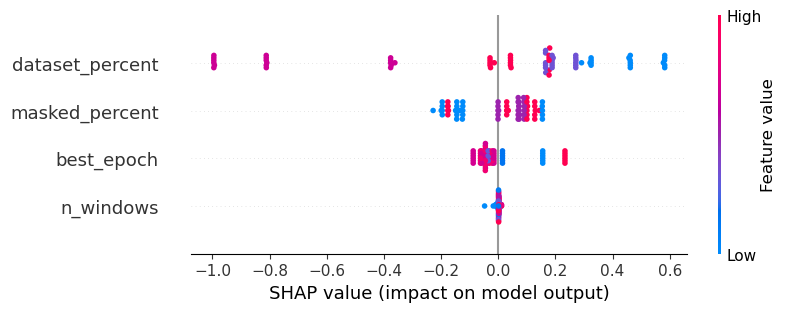

Feature,RandomForest_Importance_pcnt,SelectKBest__pcnt,SHAP_Impact_pcnt,Correlation_pcnt
dataset_percent,58.888877,92.916337,18.810272,-38.736820
masked_percent,23.037147,0.445282,5.553891,2.907477
best_epoch,17.992349,6.618470,3.436532,11.144162
n_windows,0.081627,0.019911,0.177002,0.615062


In [55]:
result = analyzer.analyze()
result

In [56]:
from pandas.plotting import parallel_coordinates

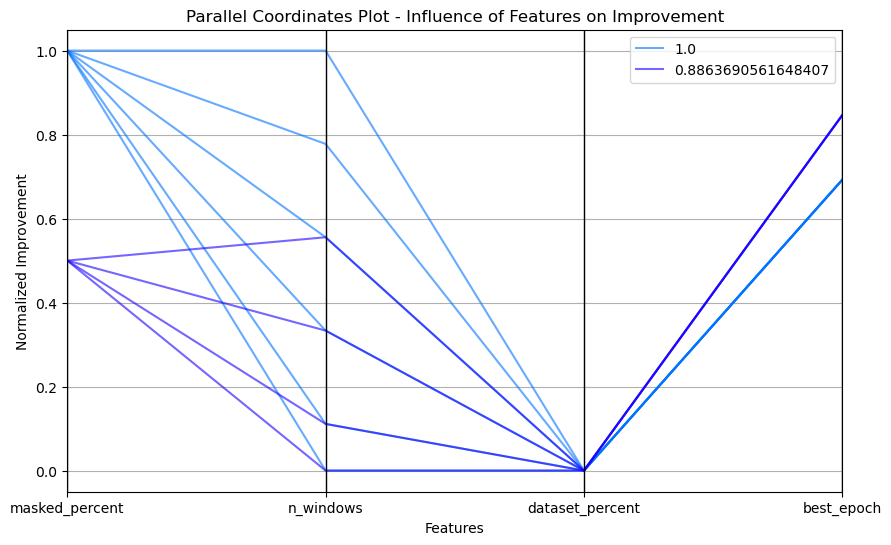

In [59]:
df_feat_normalized = df_feat.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_feat_normalized[df_feat.columns] = scaler.fit_transform(df_feat[df_feat.columns])
plt.figure(figsize=(10, 6))
top_10_df = df_feat_normalized.nlargest(10, 'improvement')
parallel_coordinates(
    top_10_df, 
    'improvement', 
    color=plt.cm.hsv(
        df_feat_normalized['improvement']
    ),
     alpha=0.6
)
plt.title('Parallel Coordinates Plot - Influence of Features on Improvement')
plt.xlabel('Features')
plt.ylabel('Normalized Improvement')
plt.show()